In [117]:
# importing all the libraries

import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 

%matplotlib inline

# import models

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

# model Evaluations
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV,GridSearchCV
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
from sklearn.metrics import precision_score,recall_score,f1_score
from sklearn.metrics import plot_roc_curve
from sklearn.model_selection import cross_val_score 

# Loading Data

In [2]:
df=pd.read_csv('indian_liver_patient.csv')
df

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1
...,...,...,...,...,...,...,...,...,...,...,...
578,60,Male,0.5,0.1,500,20,34,5.9,1.6,0.37,2
579,40,Male,0.6,0.1,98,35,31,6.0,3.2,1.10,1
580,52,Male,0.8,0.2,245,48,49,6.4,3.2,1.00,1
581,31,Male,1.3,0.5,184,29,32,6.8,3.4,1.00,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 583 entries, 0 to 582
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Age                         583 non-null    int64  
 1   Gender                      583 non-null    object 
 2   Total_Bilirubin             583 non-null    float64
 3   Direct_Bilirubin            583 non-null    float64
 4   Alkaline_Phosphotase        583 non-null    int64  
 5   Alamine_Aminotransferase    583 non-null    int64  
 6   Aspartate_Aminotransferase  583 non-null    int64  
 7   Total_Protiens              583 non-null    float64
 8   Albumin                     583 non-null    float64
 9   Albumin_and_Globulin_Ratio  579 non-null    float64
 10  Dataset                     583 non-null    int64  
dtypes: float64(5), int64(5), object(1)
memory usage: 50.2+ KB


In [4]:
df.describe()

,Age,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
count,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,579.000000,583.000000
mean,44.746141,3.298799,1.486106,290.576329,80.713551,109.910806,6.483190,3.141852,0.947064,1.286449
std,16.189833,6.209522,2.808498,242.937989,182.620356,288.918529,1.085451,0.795519,0.319592,0.452490
min,4.000000,0.400000,0.100000,63.000000,10.000000,10.000000,2.700000,0.900000,0.300000,1.000000
25%,33.000000,0.800000,0.200000,175.500000,23.000000,25.000000,5.800000,2.600000,0.700000,1.000000
50%,45.000000,1.000000,0.300000,208.000000,35.000000,42.000000,6.600000,3.100000,0.930000,1.000000
75%,58.000000,2.600000,1.300000,298.000000,60.500000,87.000000,7.200000,3.800000,1.100000,2.000000
max,90.000000,75.000000,19.700000,2110.000000,2000.000000,4929.000000,9.600000,5.500000,2.800000,2.000000


In [5]:
df['Dataset'].value_counts()

1    416
2    167
Name: Dataset, dtype: int64

# EDA

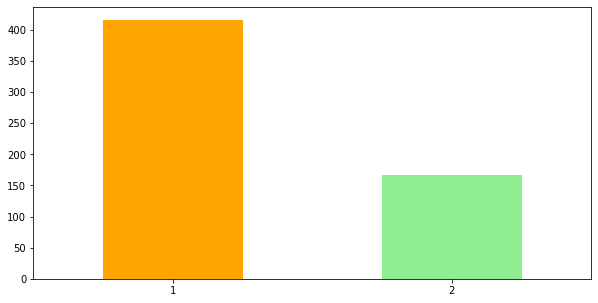

In [6]:
fig,ax =plt.subplots(figsize=(10,5))
df['Dataset'].value_counts().plot(kind='bar',ax=ax,color=['orange','lightgreen'])
plt.xticks(rotation=0);

In [82]:
la= LabelEncoder()
df["Gender"]=la.fit_transform(df["Gender"])

In [83]:
df

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Target
0,65,0,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,1,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,1,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,1,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,1,3.9,2.0,195,27,59,7.3,2.4,0.40,1
...,...,...,...,...,...,...,...,...,...,...,...
578,60,1,0.5,0.1,500,20,34,5.9,1.6,0.37,2
579,40,1,0.6,0.1,98,35,31,6.0,3.2,1.10,1
580,52,1,0.8,0.2,245,48,49,6.4,3.2,1.00,1
581,31,1,1.3,0.5,184,29,32,6.8,3.4,1.00,1


In [7]:
df.isna().sum()

Age                           0
Gender                        0
Total_Bilirubin               0
Direct_Bilirubin              0
Alkaline_Phosphotase          0
Alamine_Aminotransferase      0
Aspartate_Aminotransferase    0
Total_Protiens                0
Albumin                       0
Albumin_and_Globulin_Ratio    4
Dataset                       0
dtype: int64

In [8]:
df.dropna(inplace=True)

In [9]:
df.isna().sum()

Age                           0
Gender                        0
Total_Bilirubin               0
Direct_Bilirubin              0
Alkaline_Phosphotase          0
Alamine_Aminotransferase      0
Aspartate_Aminotransferase    0
Total_Protiens                0
Albumin                       0
Albumin_and_Globulin_Ratio    0
Dataset                       0
dtype: int64

In [10]:
over50=df[df['Age']>50]
over50

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1
...,...,...,...,...,...,...,...,...,...,...,...
563,64,Male,1.4,0.5,298,31,83,7.2,2.6,0.50,1
567,52,Male,2.7,1.4,251,20,40,6.0,1.7,0.39,1
571,90,Male,1.1,0.3,215,46,134,6.9,3.0,0.70,1
578,60,Male,0.5,0.1,500,20,34,5.9,1.6,0.37,2


Text(0.5, 0.98, 'Liver Disease Analysis')

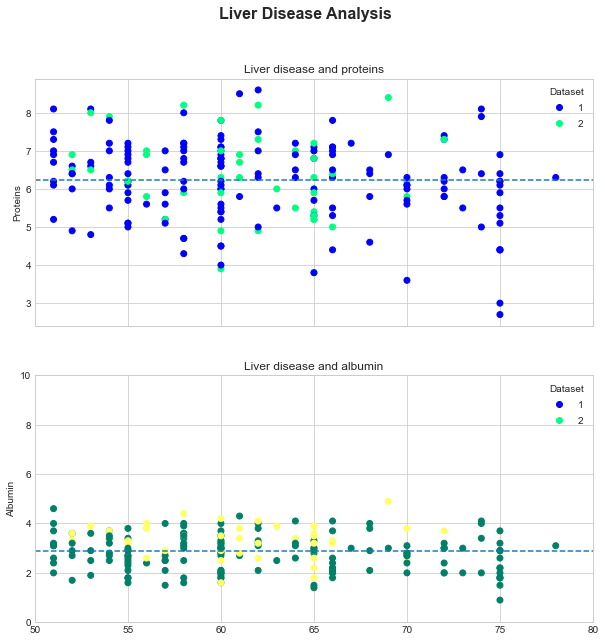

In [11]:
plt.style.use('seaborn-whitegrid')
fig , (ax0,ax1)=plt.subplots(nrows = 2,ncols=1,figsize=(10,10),sharex=True)
scatter=ax0.scatter(x=over50['Age'],y=over50['Total_Protiens'],c=over50['Dataset'],cmap='winter')
ax0.set(title='Liver disease and proteins',ylabel='Proteins')
ax0.legend(*scatter.legend_elements(),title='Dataset')
ax0.axhline(y=over50['Total_Protiens'].mean(),linestyle='--')
ax0.set_xlim([50,80])

scatter2=ax1.scatter(x=over50['Age'],y=over50['Albumin'],c=over50['Dataset'],cmap='summer')
ax1.set(title='Liver disease and albumin',ylabel='Albumin')
ax1.legend(*scatter.legend_elements(),title='Dataset')
ax1.axhline(y=over50['Albumin'].mean(),linestyle='--')
ax1.set_xlim([50,80])
ax1.set_ylim([0,10])

fig.suptitle('Liver Disease Analysis',fontsize=16,fontweight='bold')

<AxesSubplot:ylabel='Frequency'>

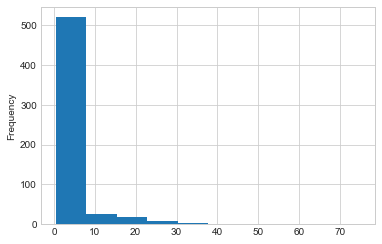

In [12]:
df['Total_Bilirubin'].plot.hist()

<AxesSubplot:ylabel='Frequency'>

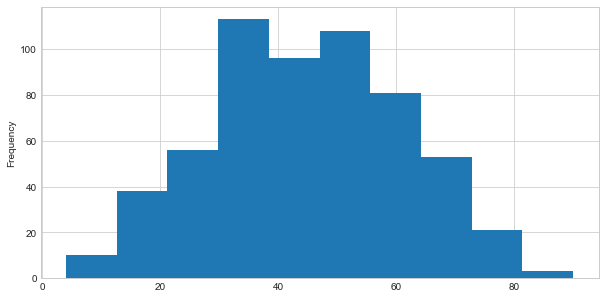

In [13]:
df['Age'].plot.hist(figsize=(10,5))

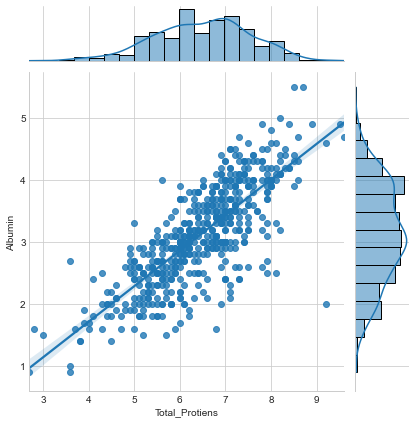

In [14]:
sns.jointplot(x='Total_Protiens',y='Albumin',data=df,kind='reg')

In [15]:
corr=df.corr()

In [16]:
corr

,Age,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
Age,1.000000,0.011000,0.006784,0.078878,-0.087799,-0.020499,-0.186248,-0.264211,-0.216408,-0.133164
Total_Bilirubin,0.011000,1.000000,0.874481,0.205739,0.213375,0.237323,-0.007906,-0.222087,-0.206267,-0.220218
Direct_Bilirubin,0.006784,0.874481,1.000000,0.234008,0.233180,0.257022,0.000033,-0.228409,-0.200125,-0.246273
Alkaline_Phosphotase,0.078878,0.205739,0.234008,1.000000,0.124777,0.166580,-0.027062,-0.163419,-0.234166,-0.183363
Alamine_Aminotransferase,-0.087799,0.213375,0.233180,0.124777,1.000000,0.791862,-0.042432,-0.028658,-0.002375,-0.163117
Aspartate_Aminotransferase,-0.020499,0.237323,0.257022,0.166580,0.791862,1.000000,-0.025751,-0.084915,-0.070040,-0.151834
Total_Protiens,-0.186248,-0.007906,0.000033,-0.027062,-0.042432,-0.025751,1.000000,0.783112,0.234887,0.033614
Albumin,-0.264211,-0.222087,-0.228409,-0.163419,-0.028658,-0.084915,0.783112,1.000000,0.689632,0.159770
Albumin_and_Globulin_Ratio,-0.216408,-0.206267,-0.200125,-0.234166,-0.002375,-0.070040,0.234887,0.689632,1.000000,0.163131
Dataset,-0.133164,-0.220218,-0.246273,-0.183363,-0.163117,-0.151834,0.033614,0.159770,0.163131,1.000000


<AxesSubplot:>

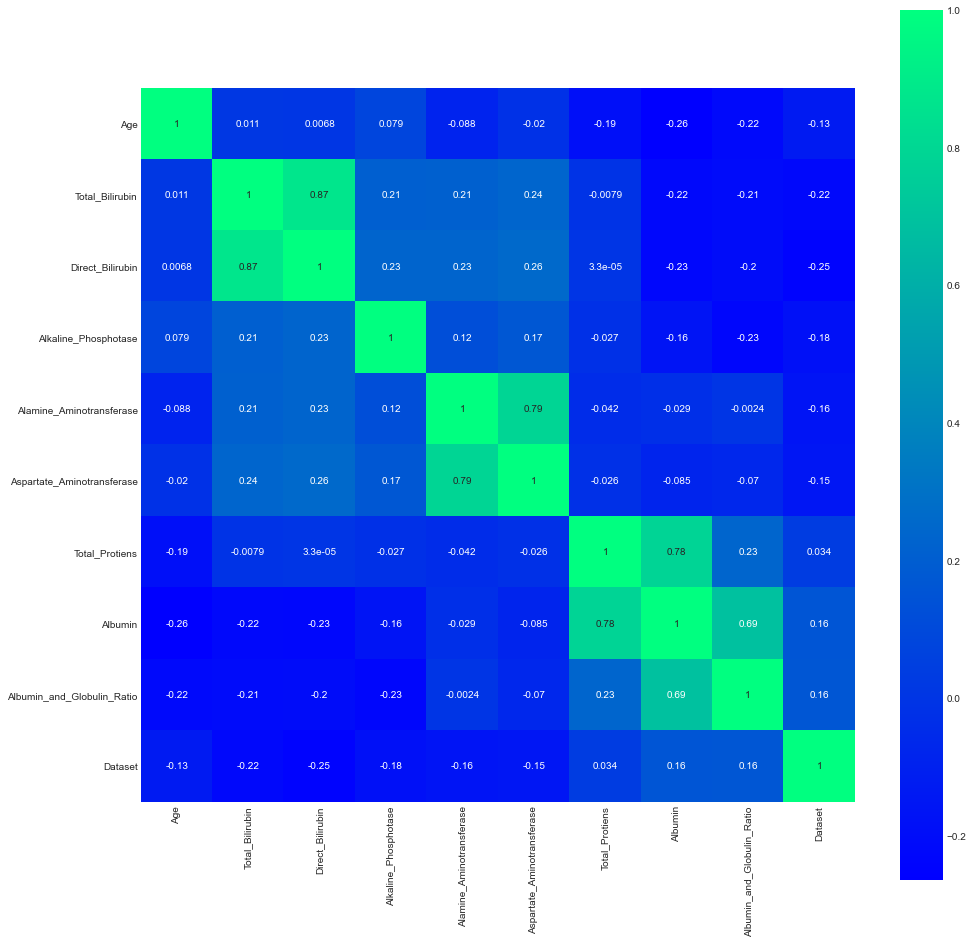

In [17]:
plt.figure(figsize=(16,16))
sns.heatmap(corr,cbar=True,square=True,annot=True,cmap='winter')

# Modeling

In [18]:
df.columns

Index(['Age', 'Gender', 'Total_Bilirubin', 'Direct_Bilirubin',
       'Alkaline_Phosphotase', 'Alamine_Aminotransferase',
       'Aspartate_Aminotransferase', 'Total_Protiens', 'Albumin',
       'Albumin_and_Globulin_Ratio', 'Dataset'],
      dtype='object')

In [21]:
df.rename(columns={'Dataset':'Target'},inplace=True)

In [124]:
X=df[['Total_Bilirubin',
       'Alkaline_Phosphotase', 'Alamine_Aminotransferase',
      'Total_Protiens','Age','Gender',
       'Albumin_and_Globulin_Ratio']]
'''scaler = MinMaxScaler()
X = scaler.fit_transform(X)'''

'scaler = MinMaxScaler()\nX = scaler.fit_transform(X)'

In [125]:
y=df['Target']

In [126]:
np.random.seed(42)

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.3)

In [127]:

models = {
    'Logistic Regression': LogisticRegression(),
    'KNN': KNeighborsClassifier(),
    'Random Forest': RandomForestClassifier(),
    'Support Vector' : SVC(),
    'Decission Tree' : DecisionTreeClassifier()
}

# create a function to fit and score models
def fit_and_score(models,X_train,X_test,y_train,y_test):
    """
    X_train : Training data (no labels)
    X_test : Testing data(no labels)
    y_train : training data(no lables)
    y_test : test lables
    """
    np.random.seed(42)

    model_scores = {}
    for name, model in models.items():
        model.fit(X_train,y_train)
        model_scores[name] = model.score(X_test,y_test)

    return model_scores

In [128]:
model_score = fit_and_score(models = models,
                            X_train=X_train,
                            X_test=X_test,
                            y_train=y_train,
                            y_test=y_test)

model_score

/Users/vismayrathod/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'Logistic Regression': 0.6494252873563219,
 'KNN': 0.6379310344827587,
 'Random Forest': 0.6781609195402298,
 'Support Vector': 0.6494252873563219,
 'Decission Tree': 0.6494252873563219}

<AxesSubplot:>

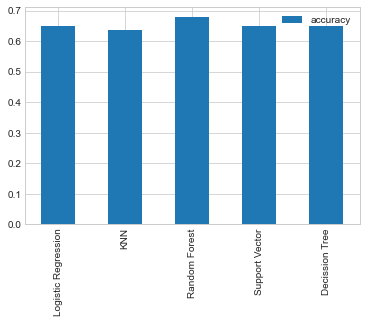

In [129]:
model_compare = pd.DataFrame(model_score, index=['accuracy'])
model_compare.T.plot.bar()

In [130]:
model_compare

,Logistic Regression,KNN,Random Forest,Support Vector,Decission Tree
accuracy,0.649425,0.637931,0.678161,0.649425,0.649425


# Hyperparamater tuning

In [131]:
train_score = []
test_score = []

neighbours = range(1,21)
knn = KNeighborsClassifier()

for i in neighbours:
    knn.set_params(n_neighbors = i)

    #fit the algorithm

    knn.fit(X_train,y_train)

    train_score.append(knn.score(X_train,y_train))

    test_score.append(knn.score(X_test,y_test))

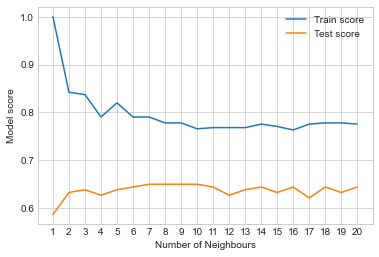

In [132]:
 plt.plot(neighbours,train_score, label='Train score')
 plt.plot(neighbours,test_score,label='Test score')
 plt.xticks(np.arange(1,21,1))
 plt.xlabel('Number of Neighbours')
 plt.ylabel('Model score')
 plt.legend()

# Hyperparameter tuning with  RandomizedSearchCV

We will tune:
* RandomForestClassifier
* Logistic Regression

In [133]:
log_reg_grid = {
    'C':np.logspace(-4,4,20),
    'solver':['liblinear']
}

rf_grid = {
    'n_estimators':np.arange(10,1000,50),
    'max_depth':[None,3,5,10],
    'min_samples_split':np.arange(2,20,20),
    'min_samples_leaf':np.arange(1,20,2)
}


In [134]:
np.random.seed(42)
rs_log_reg = RandomizedSearchCV(LogisticRegression(),
            param_distributions=log_reg_grid,
            cv = 5,
            n_iter=20,
            verbose=True,
            n_jobs=-1)

rs_log_reg.fit(X_train,y_train)            

Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    1.4s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    1.5s finished


RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=20, n_jobs=-1,
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'solver': ['liblinear']},
                   verbose=True)

In [135]:
rs_log_reg.best_params_


{'solver': 'liblinear', 'C': 0.08858667904100823}

In [136]:
rs_log_reg.score(X_test,y_test)

0.6551724137931034

In [137]:
# tune RandomForest
np.random.seed(42)
rs_rf = RandomizedSearchCV(RandomForestClassifier(),
        param_distributions=rf_grid,
        cv=5,
        verbose=True,
        n_iter=20,
        n_jobs=-1)

rs_rf.fit(X_train,y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    2.4s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    7.2s finished


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=20,
                   n_jobs=-1,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([2]),
                                        'n_estimators': array([ 10,  60, 110, 160, 210, 260, 310, 360, 410, 460, 510, 560, 610,
       660, 710, 760, 810, 860, 910, 960])},
                   verbose=True)

In [138]:
#find best hyperparameters
rs_rf.best_params_

{'n_estimators': 10,
 'min_samples_split': 2,
 'min_samples_leaf': 17,
 'max_depth': 10}

In [139]:
rs_rf.score(X_test,y_test)

0.6551724137931034

# Hyperparamater tuning for LogisticRegressionn using GridSearchCV

In [140]:
log_reg_grid = {'C': np.logspace(-4,4,30),
                'solver': ['liblinear']}

gs_log_reg = GridSearchCV(LogisticRegression(),
                        param_grid = log_reg_grid,
                        cv = 5,
                        verbose = True,
                        n_jobs = -1)
        
gs_log_reg.fit(X_train,y_train)

Fitting 5 folds for each of 30 candidates, totalling 150 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:    0.2s finished


GridSearchCV(cv=5, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': array([1.00000000e-04, 1.88739182e-04, 3.56224789e-04, 6.72335754e-04,
       1.26896100e-03, 2.39502662e-03, 4.52035366e-03, 8.53167852e-03,
       1.61026203e-02, 3.03919538e-02, 5.73615251e-02, 1.08263673e-01,
       2.04335972e-01, 3.85662042e-01, 7.27895384e-01, 1.37382380e+00,
       2.59294380e+00, 4.89390092e+00, 9.23670857e+00, 1.74332882e+01,
       3.29034456e+01, 6.21016942e+01, 1.17210230e+02, 2.21221629e+02,
       4.17531894e+02, 7.88046282e+02, 1.48735211e+03, 2.80721620e+03,
       5.29831691e+03, 1.00000000e+04]),
                         'solver': ['liblinear']},
             verbose=True)

In [141]:
gs_log_reg.best_params_

{'C': 0.05736152510448681, 'solver': 'liblinear'}

In [142]:
gs_log_reg.score(X_test,y_test) 

0.6494252873563219

In [143]:
rf_grid = {
    'n_estimators':np.arange(10,1000,50),
    'max_depth':[None,3,5,10],
    'min_samples_split':np.arange(2,20,20),
    'min_samples_leaf':np.arange(1,20,2)
}

gs_rf = GridSearchCV(RandomForestClassifier(),
                        param_grid = rf_grid,
                        cv = 5,
                        verbose = True)
        
gs_rf.fit(X_train,y_train)

Fitting 5 folds for each of 800 candidates, totalling 4000 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  52 tasks      | elapsed:    3.2s
[Parallel(n_jobs=-1)]: Done 224 tasks      | elapsed:   17.6s
[Parallel(n_jobs=-1)]: Done 474 tasks      | elapsed:   38.0s
[Parallel(n_jobs=-1)]: Done 824 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 1274 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done 1824 tasks      | elapsed:  2.6min
[Parallel(n_jobs=-1)]: Done 2474 tasks      | elapsed:  3.7min
[Parallel(n_jobs=-1)]: Done 3224 tasks      | elapsed:  4.9min
[Parallel(n_jobs=-1)]: Done 4000 out of 4000 | elapsed:  6.2min finished


GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [None, 3, 5, 10],
                         'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                         'min_samples_split': array([2]),
                         'n_estimators': array([ 10,  60, 110, 160, 210, 260, 310, 360, 410, 460, 510, 560, 610,
       660, 710, 760, 810, 860, 910, 960])},
             verbose=True)

In [144]:
gs_rf.best_params_

{'max_depth': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 710}

In [151]:
gs_rf.score(X_test,y_test) 

0.6954022988505747

In [152]:
print(classification_report(y_test,y_preds))

              precision    recall  f1-score   support

           1       0.69      0.95      0.80       113
           2       0.70      0.23      0.35        61

    accuracy                           0.70       174
   macro avg       0.70      0.59      0.57       174
weighted avg       0.70      0.70      0.64       174



In [153]:
import joblib
joblib.dump(gs_rf, 'liver_model.pkl')

['liver_model.pkl']